# Scientific Computing Coursework

## Ode solvers

Starting with ODE solvers, I coded up a function called "solve_to" which takes an ODE and solves it using either the Euler Method or the Runga Kutta 4 method. The function created takes seven inputs with the first being the ODE. It is important to note that in every ODE and PDE that was created in a function, I added "t" as the first input regardless of the presence of a time variable in the actual equation. This is so that all my functions are consistent and it can easily deal with an ODE or PDE that requires a time variable as an input. An input that was added later as more complex functions were tried was "args". This takes the arguments of the ODE that is inputted and passes them through the ODE in the function. This is useful as we want to use the ODE function in our solver and not just the ODE at a singular point. 	

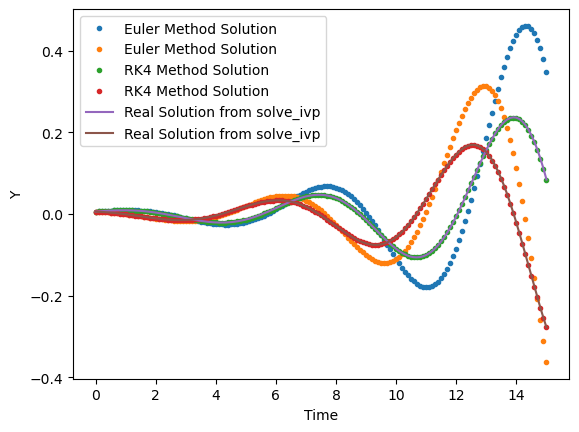

In [1]:
from IVPODEs import solve_to, VanDerPol_Ode
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

[t_total1, y_total1] = solve_to(VanDerPol_Ode,0,15,[0.006,0.006],0.1,'Euler', args = [0.5])
[t_total2, y_total2] = solve_to(VanDerPol_Ode,0,15,[0.006,0.006],0.1,'RK4', args = [0.5])
sol = solve_ivp(VanDerPol_Ode, [0, 15], [0.006,0.006], args=(0.5,), dense_output=True)

t_eval = np.linspace(0, 15, 150)
y_eval = sol.sol(t_eval) 
 

plt.plot(t_total1,y_total1,'.',label = 'Euler Method Solution')
plt.plot(t_total2,y_total2,'.',label = 'RK4 Method Solution')
plt.plot(t_eval,y_eval[0],label = 'Real Solution from solve_ivp')
plt.plot(t_eval,y_eval[1],label = 'Real Solution from solve_ivp')
plt.legend(loc = 'upper left')
plt.xlabel('Time')
plt.ylabel('Y')
plt.show()

The figure above is showing both methods being used to solve the Van Der Pol equation which is a second order ODE. From this figure we can see that the RK4 method does a much better job at solving the ODE than the Euler solution. Although this could come from the fact that ‘solve_ivps’ default solver is also RK4. 

# Numerical Shooting

Numerical shooting was tough to understand, however fairly easy to implement once understood. The main function I use is called "shooting" and it pairs the two conditions needed for a limit cycle to occur. One interesting tool used here was Pythons unpacking function "*". This allows any lists that are passed through it to be unpacked into their individual elements. I also had to implement an ‘if’ statement that checked if there were any extra conditions as Python typically does not handle finding arguments for ODEs that have no conditions well. The next main function created was called "shooting_solve" which takes the conditions from "shooting" and uses "scipy.optimise.root" to find the solutions to the conditions for a given ODE.

[-2.01989105e+00  1.25262100e-29  7.62987124e+00]


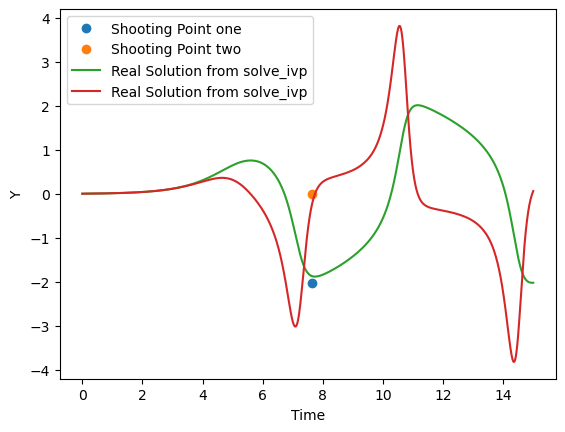

In [2]:
from Numerical_Shooting import shooting_solve
sol = solve_ivp(VanDerPol_Ode, [0, 50], [0.006,0.006], args=(2,), dense_output=True)
t_eval = np.linspace(0, 15, 1500)
y_eval = sol.sol(t_eval) 

sol = shooting_solve(VanDerPol_Ode, [0.5, 0.5,6], [2])
print(sol)

plt.plot(sol[2],sol[0],'o',label = 'Shooting Point one')
plt.plot(sol[2],sol[1],'o',label = 'Shooting Point two')
plt.plot(t_eval,y_eval[0],label = 'Real Solution from solve_ivp')
plt.plot(t_eval,y_eval[1],label = 'Real Solution from solve_ivp')
plt.legend(loc = 'upper left')
plt.xlabel('Time')
plt.ylabel('Y')
plt.show()

In the figure above it can be seen how the two points lie on the solved Van Der Pol Ode for mu = 2. This is where the start of the limit cycle occurs, hence the unusual solution of the ODE compared to the previous figure. The first point is slightly off the graph as with the second point but that is most probably due to my initial guesses. These initial guesses are challenging to get right and can lead to this issue if not close enough. However this was as close as I was able to get.

# Code Testing

To test my code I decided to use a package called ‘pytest’. This was because I had previous experience using it before and therefore felt more comfortable using it. Using ‘pytest’, I was able to set up a few tests on each of my main functions that checked whether or not the function would still work on functions that i had previously got them working on. One drawback to the code created is that it did not have checks for all of the different input types that could have caused problems such as floats and tuples. In the future I would implement this as it adds another layer of protection against problems arising in my code. The tests also take around 2 minutes to complete each time which is quite time consuming when run frequently. In the future I would like to section off the test script so that I could potentially only run a test for a group of functions that are in the same script. This way I could do lots of smaller tests when changing one script and a few large tests towards the end of writing functions.  I also implemented code testing fairly late in the process of the course which with reflection was a mistake. This would have saved me a lot of time if I caught any problems right away. 

# Numerical Continuation

This part of the coursework was by far the hardest to implement compared to the previous sections. Most notably pseudo arclength numerical continuation. Both my "natural_parameter" and "pseudo_arclength" functions have the same number of inputs. I chose to do this even though pseudo arclength requires an extra point to start as this allowed me to compare the two a lot easier. To get the second point that is needed for pseudo arclength, I call the natural parameter function to find the next point. I chose to do this instead of allowing the user to input a second known point as I felt it makes it more user friendly. In future I could add the functionality to enter in two known points instead of using the natural parameter function so that the user is presented with the choice as to whether you'd like to use your own points or a point collected through natural parameter continuation.

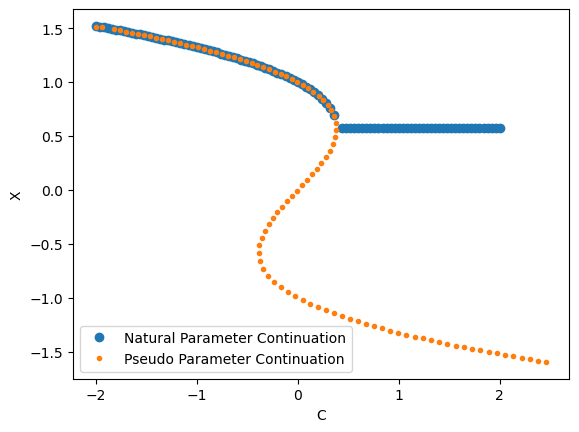

In [18]:
from Numerical_cont import funct, hopf_ode, natural_parameter, pseudo_parameter

y1,x1 = natural_parameter(funct, 1.521, -2,2,100)
y2,x2 = pseudo_parameter(funct, 1.521, -2,4,100)

plt.plot(y1,x1,'o',label = 'Natural Parameter Continuation')
plt.plot(y2,x2[0,:],'.',label = 'Pseudo Parameter Continuation')
plt.legend(loc= 'lower left')
plt.xlabel('C')
plt.ylabel('X')
plt.show()

The graph shows both natural parameter continuation and pseudo arclength continuation plotting the curve of a cubic function. As can be seen, pseudo arclength continuation follows the cubic curve while natural paramter continuation gets stuck at the first inflection point. This is expected from natural parameter continuation as it fails to follow curves of this nature. For my psuedo arclength continuation function, I have to call the function to have its parameter values incrementing between 2 and -4 rather than 2 and -2. This is because in the function I have an if statement that checks if the amount of iterations has gone past the number of inputted steps that the user would like. At the start the function divides the section up into an equal amount of points across the section which is incorrect as between -0.5 and 0.5 there are considerably more points. In the future, I would like to change this so that the function maps from p0 to p1 no matter how many points are in between. 

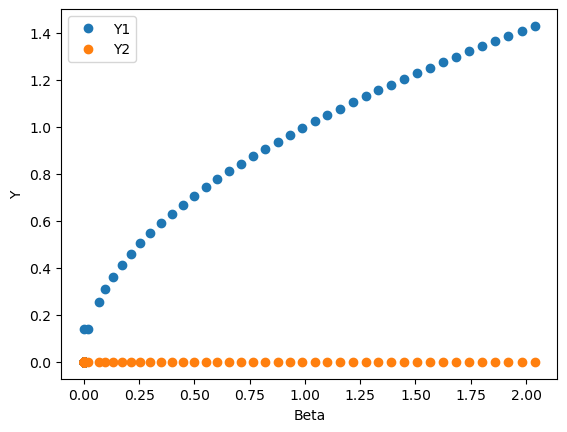

In [4]:
x3,y3 = pseudo_parameter(hopf_ode, (0.1,0,6), 0, 2, 100, discretisation='shooting')

plt.plot(x3,y3[0,:],'o',label = 'Y1')
plt.plot(x3,y3[1,:],'o',label = 'Y2')
plt.xlabel('Beta')
plt.ylabel('Y')
plt.legend(loc = 'upper left')

I was also able to incorporate my shooting function in with the pseudo arclength continuation function which when run with hopf bifurcation normal form, we get this graph above. The graph is showing the pitchfork bifurcation that occurs with hopf. However, it is only plotting the positive values suggesting that my code isn't running through all the Y1 values that it could be. In the future, I would like to fix this problem. 

# PDE Solvers

For my PDE solvers, I started off coding them in nested for loops. However, I quickly realised that coding them up is a lot easier and runs a lot faster when coding them in matrix form. Therefore, I created a function called ConstructAandB which takes in seven inputs and outputs your A and B matrices. Within this i also have some if statements that change both the A and B matrix depending on the type of boundary condition used. I chose to take an input called robin_gamma so that the function takes in the separate u dependent variable when constructing the A and B matrices. I also coded up a function that created the vector of my initial condition as that was needed throughout each of the methods.

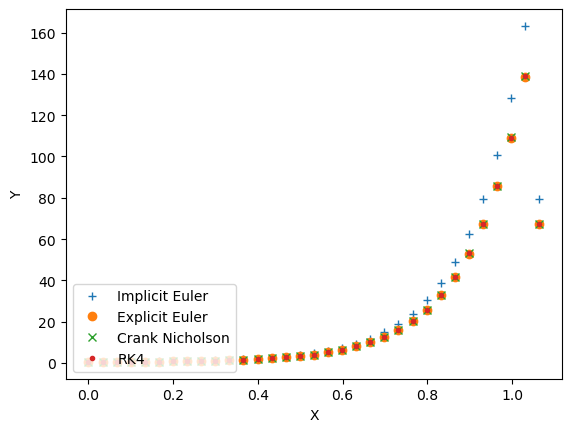

In [32]:
    from ImplicitEuler import *
    N = 31
    D = 0.1
    a = 0
    b = 1
    bc_left = 0
    bc_right = 0
    t_end = 1
    dt = 0.01
    
    start_rk4 = time.time()
    U_exact_rk4, X = RK4PDESolver(N,a,b,bc_left,bc_right,t_end,InitialCond,dt,D,'Robin','Neumann',1) 
    end_rk4 = time.time()
    start_exp = time.time()
    U_exact_Euler, X = EXPEulerPDESolver(N,a,b,bc_left,bc_right,t_end,InitialCond,dt,D,'Robin','Neumann',1) 
    end_exp = time.time()
    start_imp = time.time()
    U_Imp,X_Imp = ImplicitEuler(N,a,b,bc_left,bc_right,t_end,InitialCond,dt,D,'Robin','Neumann',1)
    end_imp = time.time()
    start_crank = time.time()
    U_Crank,X_Crank = CrankNicholson(N,a,b,bc_left,bc_right,t_end,InitialCond,dt,D,'Robin','Neumann',1) 
    end_crank = time.time()
    plt.plot(X_Imp,U_Imp[:,-1],'+', label = 'Implicit Euler')
    plt.plot(X, U_exact_Euler[-1],'o',label = 'Explicit Euler')
    plt.plot(X_Crank,U_Crank[:,-1],'x',label = 'Crank Nicholson')
    plt.plot(X, U_exact_rk4[-1],'.',label = 'RK4')
    plt.legend(loc = 'lower left')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

The figure above shows each of the solvers plotting a solution to the diffusion equation with Robin boundary conditions as the left condition and Neumann on the right. To allow for the different boundary conditions, I had to change the number of grid points created to N+1 instead of N as there is an extra ghost point in both Neumann and Robin boundary conditions. When both the left and the right condition were either Robin or Neumann, there were then two ghost points to be added. This took me time to get working as the 'and' and 'or' statements need to be written in a very specific way. For example, upon first coding it up, there was an if statement that looked as follows:

In [11]:
#if bc_left_condition == 'Neumann' or 'Robin' and bc_right_condition == 'Neumann' or 'Robin'

This code however would allow any input with a Neumann or a Robin boundary condition in and didn't correctly follow the and statement that was included. Bracketing both conditions so that the 'and' function connected the two conditions seemed to fix this problem so that only inputs with both boundary conditions being either Neumann or Robin could enter the if statement. In the future I would have liked to code up the boundary conditions in a class so as to avoid the repeated 'if' statements that occur frequently in my code.

In [33]:
print('Time taken for Implicit Euler to run was:', end_imp-start_imp) 
print('Time taken for Crank Nicholson to run was:', end_crank-start_crank) 
print('Time taken for RK4 to run was:', end_rk4-start_rk4) 
print('Time taken for Explicit Euler to run was:', end_exp-start_exp)

Time taken for Implicit Euler to run was: 0.004410982131958008
Time taken for Crank Nicholson to run was: 0.004950046539306641
Time taken for RK4 to run was: 2.071946144104004
Time taken for Explicit Euler to run was: 0.23800897598266602


The code above shows the time that each method takes to run for the same inputs. As we can see the RK4 method is the longest at around five times slower than the Explicit Euler method, the next slowest method. This makes sense as there are four more equations that have to be computed at each loop in the RK4 method. Crank Nicholson is the fastest but not by too much as it should be of a similar computational complexity compared to the Implicit Euler method. 

<function matplotlib.pyplot.show(close=None, block=None)>

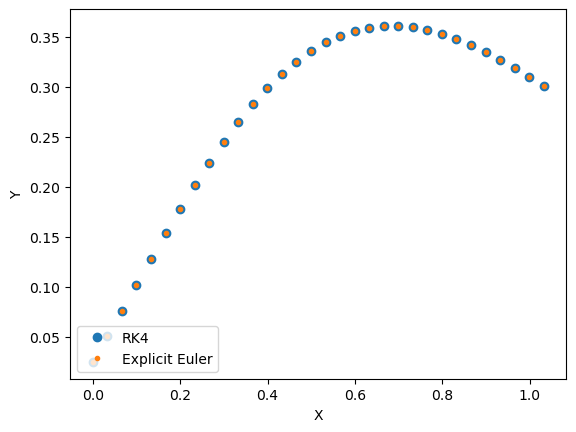

In [35]:
U_exact_rk4, X1 = RK4PDESolver(N,a,b,bc_left,bc_right,t_end,InitialCond,dt,D,'Dirichlet','Robin',1,  q) 
U_exact_Euler, X2 = EXPEulerPDESolver(N,a,b,bc_left,bc_right,t_end,InitialCond,dt,D,'Dirichlet','Robin',1,  q)

plt.plot(X1, U_exact_rk4[-1],'o',label = 'RK4')
plt.plot(X2, U_exact_Euler[-1],'.',label = 'Explicit Euler')
plt.legend(loc = 'lower left')
plt.xlabel('X')
plt.ylabel('Y')
plt.show

The graph above is showing how the RK4 and Explicit Euler method solve the bratu problem with Robin boundary conditions at the right most boundary. I was unable to get the IMEX and implicit euler methods working for this problem due to time constraints and decided that these two methods were sufficient at showing that my code can handle these problems. I once again implemented a time input for my function for 'q' as i wanted to be consistent with the rest of my functions and allow for that input incase it was needed further down the line. In the PDE function, I decided to use an if statement that checks wether the input 'q' is an integer or a function. I did this as I did not want to discourage the involvement of a simple integer as a source term. However, it would have been better to implement this in a class as running an 'if' statement every time these functions are called, will be significantly slower.

# Learning Log

Throughout this course I have learnt a great deal from the many mistakes I have made. This in turn has improved my coding ability significantly, even in the minor details such as efficiently debugging my code. The importance of code testing has become painfully clear to me throughout this process as I only decided to implement code testing later on in the project. If I had taken the short time to perform these tests earlier on in the process, I would have found problems in my code much faster. Since starting this project I have learnt that initialising an empty array and adding values to it by iteration is much faster and easier to execute than appending empty lists with values. Another important takeaway from this course is that I should take regular breaks when getting stuck with coding errors. I found that I would become engulfed by an error and end up spending hours on it only to get no further with it. It would then take me five minutes to fix the error when I went back to it the next day. Next time I will try to limit myself to half an hour once stuck on an error before i either move on to another problem, or take a break from coding completely. I managed to compile the two ODE solvers into one solver however, due to time constraints, I was unable to do the same with the PDE solvers. As I was unfamiliar with classes, I was unable to use them. In the future this would be an area I would like to explore. Lastly, I would've liked to plan out how each of my functions interact with each other more as there were multiple times where I had to change outputs and inputs so that they matched up with other functions. Overall, if I were to do this project again, I would place more importance upon the time managemant and planning of my code as these were my biggest downfalls.